<a href="https://colab.research.google.com/github/SamarthKharade/MLDemo/blob/main/Feature_Selection_and_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Now we are going to feature engineering**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [6]:
df.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df.drop(columns=['day','month','year'],inplace=True)

In [8]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [14]:
df.head(10)
df.tail(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
233,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,1
234,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,1
235,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,1
236,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0,1
237,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [16]:
X=df.drop('FWI',axis=1)
y=df['FWI']
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [18]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

<Axes: >

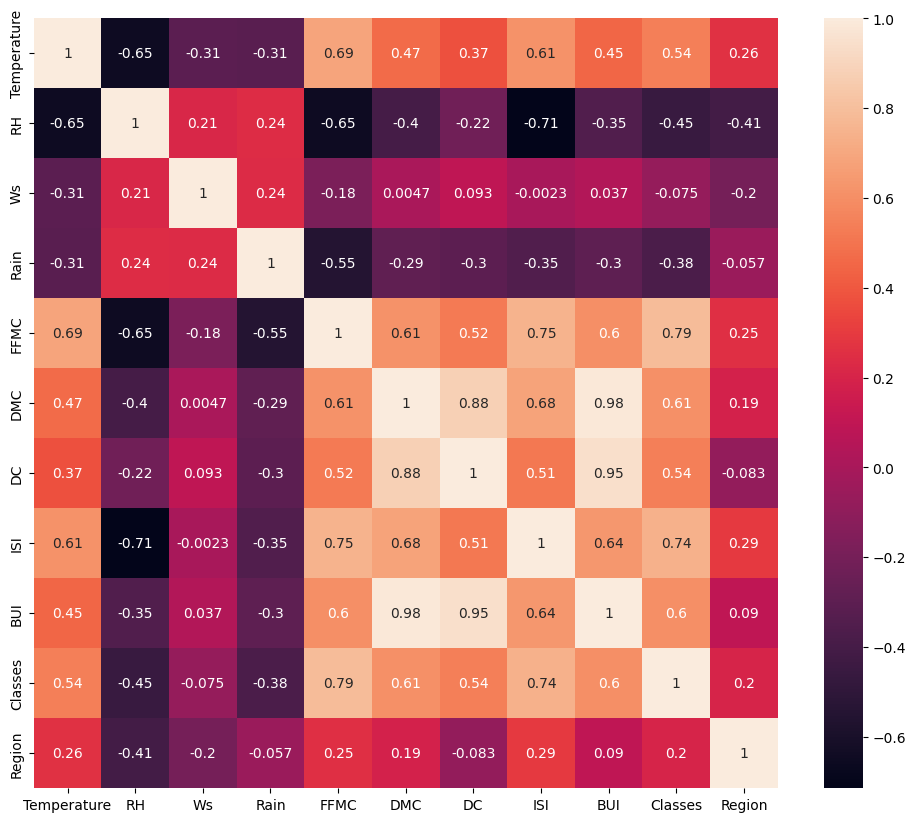

In [19]:
#Check for multi-collinearity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
#threshold matrix always set by domain expert
corr_features=correlation(X_train,0.85)

In [23]:
#drop the features which correlation value greater than threshold
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

# **Feature Scaling Or Standardization**

1.   List item
2.   List item



In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

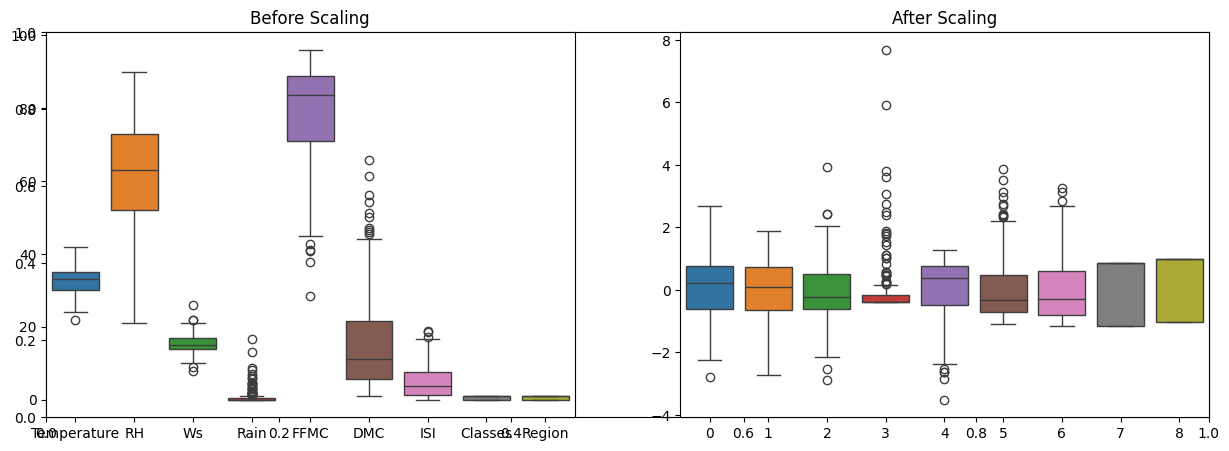

In [25]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('After Scaling')
plt.show()



# **Linear Regression Model**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [27]:
linear_reg=LinearRegression()
linear_reg.fit(X_train_scaled,y_train)
y_pred=linear_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('MAE:',mae)
print('R2Score:',r2score)
print('MSE:',mse)


MAE: 0.5049978694165687
R2Score: 0.9805895859259882
MSE: 0.5882990110708693


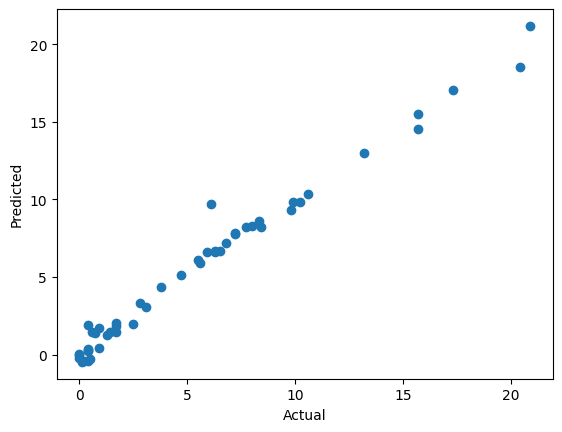

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
#Lasso Regression

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('MAE:',mae)
print('R2Score:',r2score)
print('MSE:',mse)


MAE: 1.0093958923873407
R2Score: 0.9430507350726562
MSE: 1.726042325023142


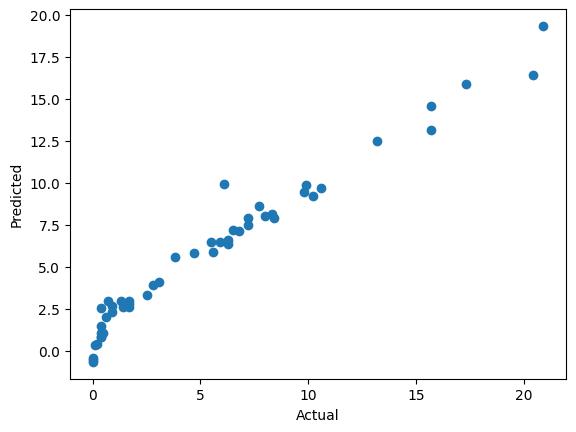

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [34]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('MAE:',mae)
print('R2Score:',r2score)
print('MSE:',mse)

MAE: 0.5192048325844797
R2Score: 0.9801058063273599
MSE: 0.6029616070548641


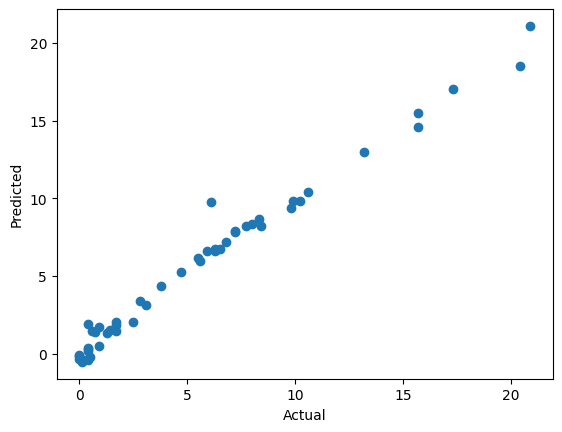

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [36]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("MAE",mae)
print("R2Score",r2score)
print("MSE",mse)


MAE 1.6834416340136709
R2Score 0.8676961352267807
MSE 4.009921298441002


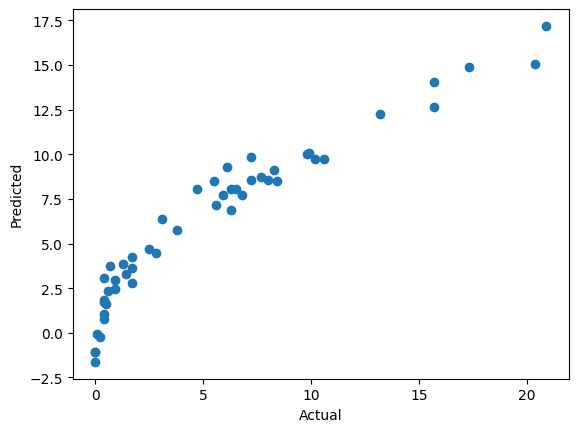

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# **Cross Validation**

MAE 0.5556715031617872
R2Score 0.978328234520343
MSE 0.6568370026125329


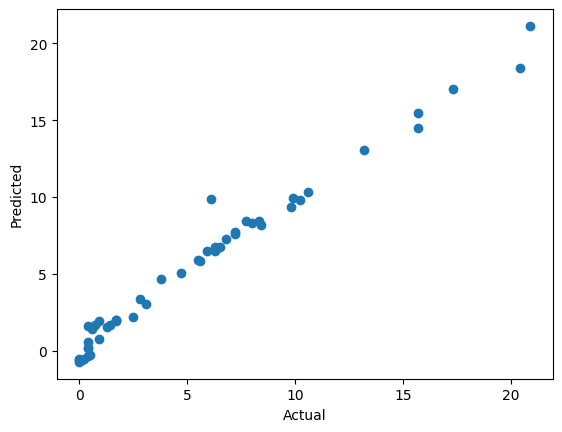

In [38]:
#Lasso Cross Validation
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5,random_state=0)
lassocv.fit(X_train_scaled,y_train)
ypred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
r2score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
print("MAE",mae)
print("R2Score",r2score)
print("MSE",mse)
plt.scatter(y_test,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


MAE 0.6869262008277153
R2Score 0.9722193780965623
MSE 0.841986797932755


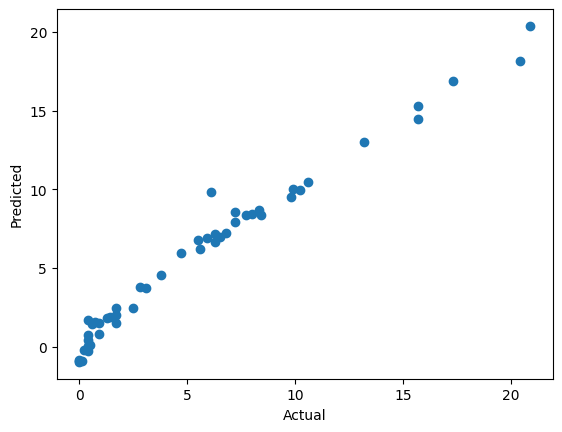

In [39]:
#Ridge Cross Validation
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
ypred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
r2score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
print("MAE",mae)
print("R2Score",r2score)
print("MSE",mse)
plt.scatter(y_test,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


MAE 0.5710147088777218
R2Score 0.9781014571778188
MSE 0.6637102658943733


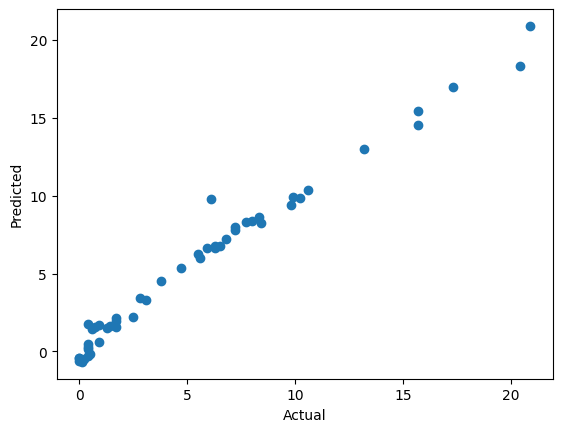

In [40]:
#Elastic Net Cross Validation
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
ypred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,ypred)
r2score=r2_score(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
print("MAE",mae)
print("R2Score",r2score)
print("MSE",mse)
plt.scatter(y_test,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [44]:
#check alpha value
elasticnetcv.alpha_


np.float64(0.028757616291182477)

In [45]:
elasticnetcv.alphas_

array([14.31273339, 13.34810307, 12.44848559, 11.60949933, 10.82705793,
       10.09735046,  9.41682284,  8.78216049,  8.19027227,  7.63827533,
        7.12348114,  6.64338235,  6.19564061,  5.77807517,  5.38865224,
        5.02547512,  4.68677492,  4.37090197,  4.07631781,  3.80158763,
        3.54537335,  3.30642705,  3.08358493,  2.87576163,  2.68194492,
        2.50119081,  2.33261892,  2.17540821,  2.02879298,  1.89205912,
        1.76454067,  1.64561653,  1.53470749,  1.43127334,  1.33481031,
        1.24484856,  1.16094993,  1.08270579,  1.00973505,  0.94168228,
        0.87821605,  0.81902723,  0.76382753,  0.71234811,  0.66433823,
        0.61956406,  0.57780752,  0.53886522,  0.50254751,  0.46867749,
        0.4370902 ,  0.40763178,  0.38015876,  0.35453733,  0.33064271,
        0.30835849,  0.28757616,  0.26819449,  0.25011908,  0.23326189,
        0.21754082,  0.2028793 ,  0.18920591,  0.17645407,  0.16456165,
        0.15347075,  0.14312733,  0.13348103,  0.12448486,  0.11

In [48]:
df.to_csv('Algerian_forest_fires_final_dataset.csv',index=False)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
